<a href="https://colab.research.google.com/github/MiraHatoum/-AAI614_Hatoum/blob/main/Graded_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm


Load the dataset:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult.zip to adult.zip


In [7]:
zip_path = "/content/adult.zip"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")

# List the extracted files
os.listdir("dataset")




['adult.data', 'old.adult.names', 'adult.names', 'Index', 'adult.test']

In [9]:
import pandas as pd

# Load the dataset
file_path = "/content/dataset/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
data = pd.read_csv(file_path, header=None, names=column_names, skipinitialspace=True)

# Check the data types and columns
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [10]:
print(data.head())

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

 Handle Missing Values

In [12]:
print(data.isnull().sum())



age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [13]:
data.replace('?', np.nan, inplace=True)
print(data.isnull().sum())


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Analyze Capital Gain and Loss

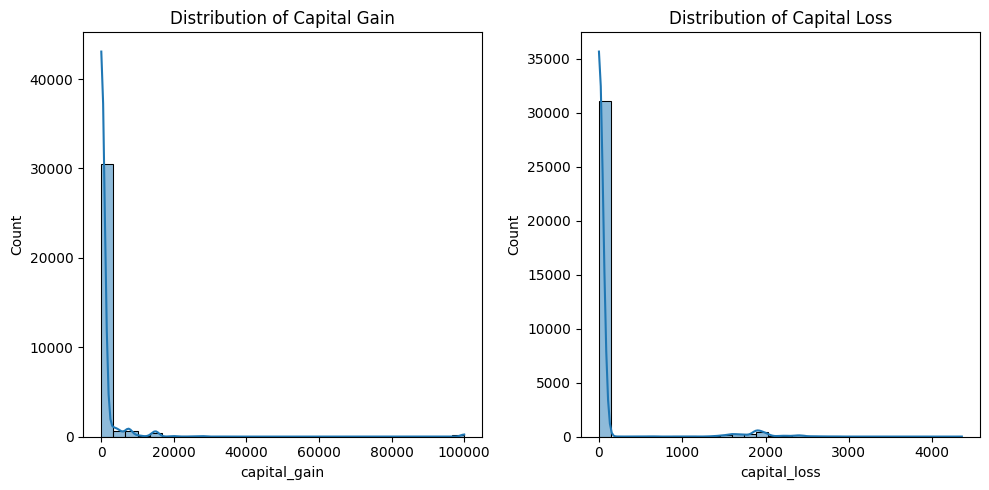

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['capital_gain'], kde=True, bins=30)
plt.title('Distribution of Capital Gain')

plt.subplot(1, 2, 2)
sns.histplot(data['capital_loss'], kde=True, bins=30)
plt.title('Distribution of Capital Loss')

plt.tight_layout()
plt.show()


In [16]:
data['capital_gain_binary'] = data['capital_gain'].apply(lambda x: 1 if x > 0 else 0)
data['capital_loss_binary'] = data['capital_loss'].apply(lambda x: 1 if x > 0 else 0)

# Check distribution of transformed variables
print(data[['capital_gain_binary', 'capital_loss_binary']].value_counts())


capital_gain_binary  capital_loss_binary
0                    0                      28330
1                    0                       2712
0                    1                       1519
Name: count, dtype: int64


Visualize distribution
Plot the distribution of fnlwgt

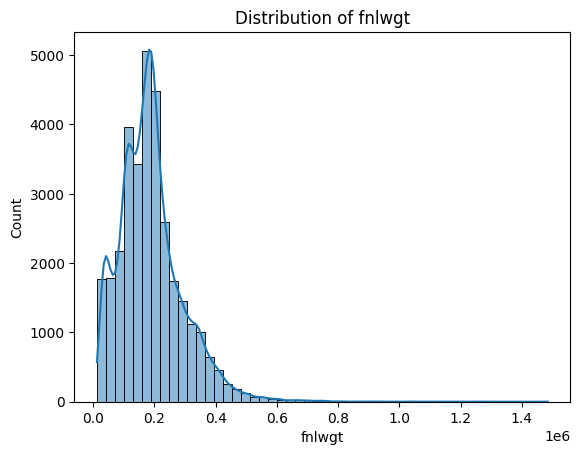

In [17]:
sns.histplot(data['fnlwgt'], kde=True, bins=50)
plt.title('Distribution of fnlwgt')
plt.show()


Compare Distribution by Gender

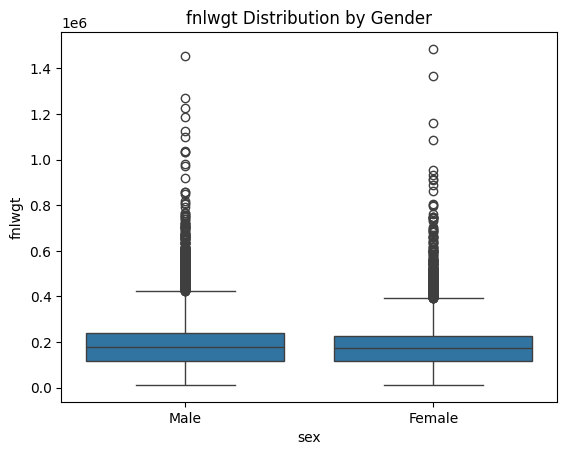

In [18]:
sns.boxplot(x='sex', y='fnlwgt', data=data)
plt.title('fnlwgt Distribution by Gender')
plt.show()


Handle Outliers

In [19]:
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data.loc[(data['fnlwgt'] < lower_bound) | (data['fnlwgt'] > upper_bound), 'fnlwgt'] = np.nan
print(data['fnlwgt'].isnull().sum())


992


Correlation Analysis

                     age  education_num  hours_per_week
age             1.000000       0.036527        0.068756
education_num   0.036527       1.000000        0.148123
hours_per_week  0.068756       0.148123        1.000000


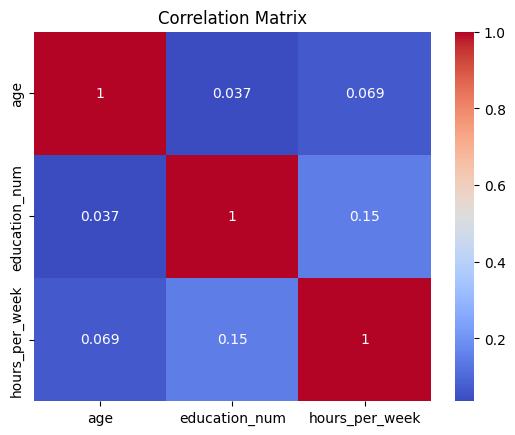

In [20]:
correlation_matrix = data[['age', 'education_num', 'hours_per_week']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Statistical Test for Correlation
Test correlations greater than |0.1|

In [21]:
from scipy.stats import pearsonr


corr, p_value = pearsonr(data['age'], data['education_num'])
print(f"Correlation: {corr}, P-value: {p_value}")


Correlation: 0.03652718946410611, P-value: 4.305718002010542e-11


In [30]:
# Display correlation pairs > |0.1|
print("Correlation Pairs with Coefficient > |0.1|:")
print(correlation_matrix[(correlation_matrix > 0.1) | (correlation_matrix < -0.1)])


Correlation Pairs with Coefficient > |0.1|:
                age  education_num  hours_per_week
age             1.0            NaN             NaN
education_num   NaN       1.000000        0.148123
hours_per_week  NaN       0.148123        1.000000


Compare Correlation by Gender

In [22]:
male_data = data[data['sex'] == 'Male']
female_data = data[data['sex'] == 'Female']

male_corr = male_data[['age', 'education_num']].corr()
female_corr = female_data[['age', 'education_num']].corr()

print("Male Correlation Matrix:\n", male_corr)
print("Female Correlation Matrix:\n", female_corr)


Male Correlation Matrix:
                     age  education_num
age            1.000000       0.060486
education_num  0.060486       1.000000
Female Correlation Matrix:
                     age  education_num
age            1.000000      -0.017899
education_num -0.017899       1.000000


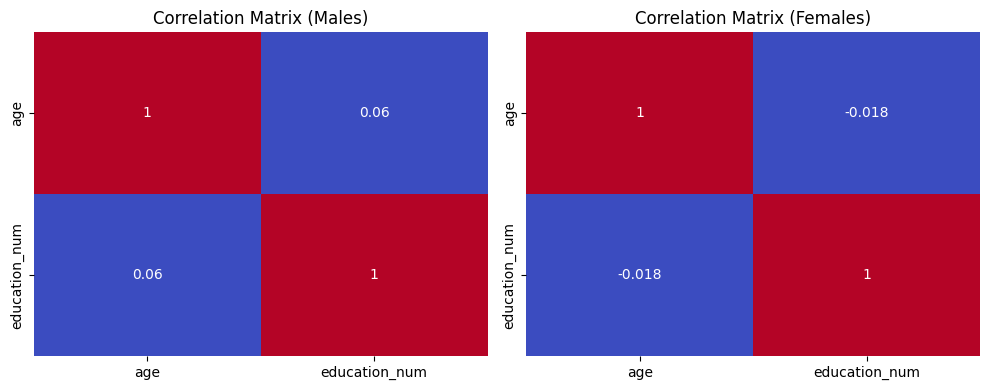

In [32]:
# Heatmap for males
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(male_corr, annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation Matrix (Males)")

# Heatmap for females
plt.subplot(1, 2, 2)
sns.heatmap(female_corr, annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation Matrix (Females)")

plt.tight_layout()
plt.show()


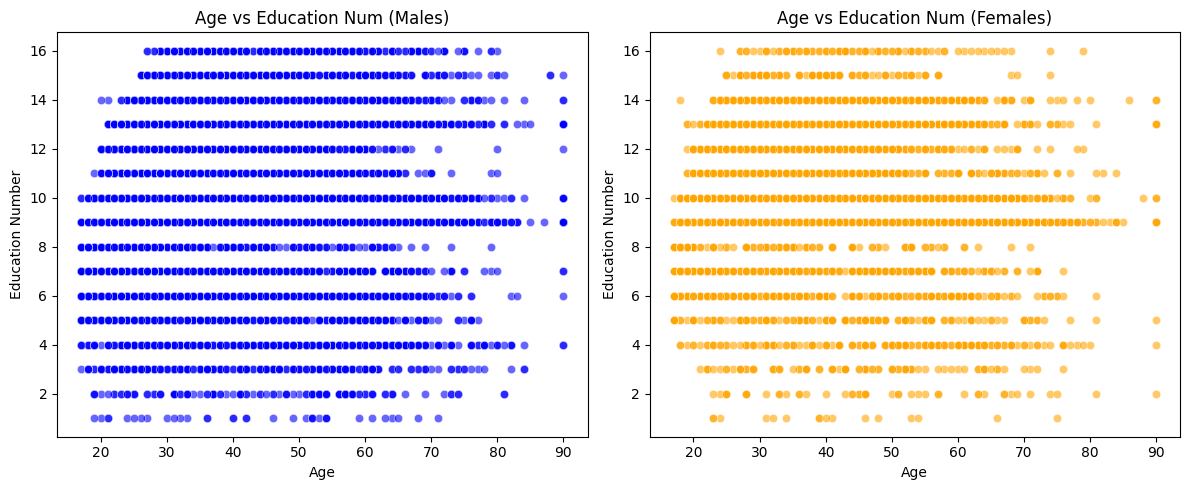

In [33]:
plt.figure(figsize=(12, 5))

# Scatter plot for males
plt.subplot(1, 2, 1)
sns.scatterplot(x=male_data['age'], y=male_data['education_num'], color='blue', alpha=0.6)
plt.title("Age vs Education Num (Males)")
plt.xlabel("Age")
plt.ylabel("Education Number")

# Scatter plot for females
plt.subplot(1, 2, 2)
sns.scatterplot(x=female_data['age'], y=female_data['education_num'], color='orange', alpha=0.6)
plt.title("Age vs Education Num (Females)")
plt.xlabel("Age")
plt.ylabel("Education Number")

plt.tight_layout()
plt.show()


In [31]:
from scipy.stats import pearsonr

# Example: Correlation between 'age' and 'education_num'
corr, p_value = pearsonr(data['age'], data['education_num'])
print(f"Correlation between age and education_num: {corr}, P-value: {p_value}")

# Example: Correlation between 'education_num' and 'hours_per_week'
corr, p_value = pearsonr(data['education_num'], data['hours_per_week'])
print(f"Correlation between education_num and hours_per_week: {corr}, P-value: {p_value}")


Correlation between age and education_num: 0.03652718946410611, P-value: 4.305718002010542e-11
Correlation between education_num and hours_per_week: 0.1481227326229122, P-value: 4.236647478996013e-159


Compute the covariance matrix

In [23]:
covariance_matrix = data[['education_num', 'hours_per_week']].cov()
print(covariance_matrix)


                education_num  hours_per_week
education_num        6.618890        4.705338
hours_per_week       4.705338      152.458995


Linear Regression Analysis

In [24]:
import statsmodels.api as sm

# Encode 'sex' as binary
data['sex_binary'] = data['sex'].map({'Male': 1, 'Female': 0})

X = sm.add_constant(data['sex_binary'])
y = data['hours_per_week']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:54:02   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4104      0.116    314.412      0.0

Add Control Variable



In [25]:
# Encode 'income' as binary
data['income_binary'] = data['income'].map({'>50K': 1, '<=50K': 0})

X_full = sm.add_constant(data[['sex_binary', 'education_num', 'income_binary']])
model_full = sm.OLS(y, X_full).fit()
print(model_full.summary())


                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:54:29   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.4218      0.288    109.184

Compare Models

In [27]:
import statsmodels.api as sm

# Define independent variables (including education_num as control)
X_control = sm.add_constant(data[['sex_binary', 'education_num']])
y = data['hours_per_week']

# Fit the regression model
model_control = sm.OLS(y, X_control).fit()

# Check the summary of the model to confirm it's working
print(model_control.summary())


                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:55:46   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.4106      0.281    104.556

In [28]:
print("Model 1 AIC:", model.aic)
print("Model 2 AIC:", model_control.aic)
print("Model 3 AIC:", model_full.aic)


Model 1 AIC: 254329.06283558588
Model 2 AIC: 253597.09093961833
Model 3 AIC: 252865.90760645183
